# Separating Events in the S.Martino di Castrozza Rainfall Time Series

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
os.chdir('DatiSanMartino')

In [4]:
dSm=pd.read_feather('DailyRainfallSMartino.fea')
dSm=dSm.set_index("Date")

### Getting all the rainy or the non rainy days is relatively easy

In [5]:
zeroRainDays=dSm[dSm["Rain[mm]"]==0.0]
zeroRainDays

,Rain[mm]
Date,
1921-01-01,0.0
1921-01-02,0.0
1921-01-04,0.0
1921-01-05,0.0
1921-01-06,0.0
...,...
NaT,0.0
NaT,0.0
NaT,0.0


In [4]:
NonzeroRainDays=dSm[dSm["Rain[mm]"]>0.0]
NonzeroRainDays

,Rain[mm]
Date,
1921-01-03,4.0
1921-01-13,35.0
1921-01-14,15.0
1921-01-31,48.0
1921-02-03,12.0
...,...
NaT,2.6
NaT,0.2
NaT,95.6


In [5]:
NonzeroRainDays.describe()

,Rain[mm]
count,10637.000000
mean,9.397067
std,13.125873
min,0.100000
25%,1.200000
50%,4.600000
75%,12.200000
max,142.200000


## Trying to find a way to count the rainy days and made statistics on them

In [1]:
dSm[dSm["Rain[mm]"]>0.0]=1
dSm

NameError: name 'dSm' is not defined

In [7]:
dSm.shift()

,Rain[mm]
Date,
1921-01-01,NaN
1921-01-02,0.0
1921-01-03,0.0
1921-01-04,1.0
1921-01-05,0.0
...,...
NaT,1.0
NaT,0.0
NaT,0.0


Those NAT are disturbing we eliminate them below

In [8]:
dSm.iloc[-53]

Rain[mm]    0.0
Name: NaT, dtype: float64

In [9]:
dSm.iloc[-54]

Rain[mm]    0.0
Name: 1990-12-31 00:00:00, dtype: float64

In [10]:
dSm.drop(dSm.tail(53).index,inplace=True) 

In [11]:
dSm.columns

Index(['Rain[mm]'], dtype='object')

In [12]:
dSm.columns=["RainNoRain"]

No rain is 0, rain is 1

In [13]:
dSm

,RainNoRain
Date,
1921-01-01,0.0
1921-01-02,0.0
1921-01-03,1.0
1921-01-04,0.0
1921-01-05,0.0
...,...
1990-12-27,0.0
1990-12-28,0.0
1990-12-29,0.0


Separating the events and counting them

In [14]:
eventsSM=dSm.ne(dSm.shift()).cumsum()
eventsSM.columns=["#"]
eventsSM

,#
Date,
1921-01-01,1
1921-01-02,1
1921-01-03,2
1921-01-04,3
1921-01-05,3
...,...
1990-12-27,7693
1990-12-28,7693
1990-12-29,7693


In [15]:
dSmCount=pd.concat([dSm,eventsSM], axis=1)
dSmCount

,RainNoRain,#
Date,,
1921-01-01,0.0,1
1921-01-02,0.0,1
1921-01-03,1.0,2
1921-01-04,0.0,3
1921-01-05,0.0,3
...,...,...
1990-12-27,0.0,7693
1990-12-28,0.0,7693
1990-12-29,0.0,7693


## Statistics of Rain Events

In [16]:
rainfall_events=dSmCount[dSmCount["RainNoRain"]>0.0]
rainfall_events

,RainNoRain,#
Date,,
1921-01-03,1.0,2
1921-01-13,1.0,4
1921-01-14,1.0,4
1921-01-31,1.0,6
1921-02-03,1.0,8
...,...,...
1990-12-21,1.0,7690
1990-12-23,1.0,7692
1990-12-24,1.0,7692


In [17]:
rainfall_events_groups=rainfall_events.groupby((rainfall_events['#'].shift() != rainfall_events['#']).cumsum())

In [18]:
rainfall_events_duration=rainfall_events_groups["RainNoRain"].sum()

<AxesSubplot:xlabel='#'>

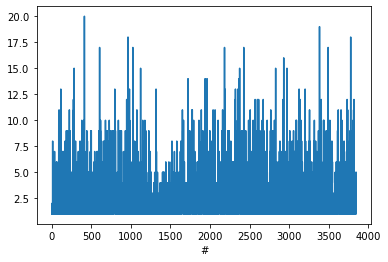

In [19]:
rainfall_events_duration.plot()

In [52]:
rainfall_events_duration.describe()

count    3846.000000
mean        2.762090
std         2.406715
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        20.000000
Name: RainNoRain, dtype: float64

<AxesSubplot:>

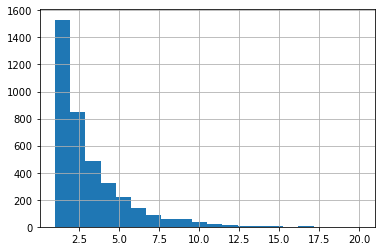

In [20]:
rainfall_events_duration.hist(bins=20)

## Statistics of non raining days

In [54]:
dSmCount['RainNoRain'] = (dSmCount['RainNoRain'] <1 ).astype(int)
dSmCount

,RainNoRain,#
Date,,
1921-01-01,1,1
1921-01-02,1,1
1921-01-03,0,2
1921-01-04,1,3
1921-01-05,1,3
...,...,...
1990-12-27,1,7693
1990-12-28,1,7693
1990-12-29,1,7693


In [56]:
dry_days=dSmCount[dSmCount["RainNoRain"]> 0]
#df.loc[df['First Season'] > 1990, 'First Season'] = 1
#dry_days.loc[dry_days["RainNoRain"]<1,"RainNoRain"]=1
dry_days

,RainNoRain,#
Date,,
1921-01-01,1,1
1921-01-02,1,1
1921-01-04,1,3
1921-01-05,1,3
1921-01-06,1,3
...,...,...
1990-12-27,1,7693
1990-12-28,1,7693
1990-12-29,1,7693


In [57]:
dry_days_groups=dry_days.groupby((dry_days['#'].shift() != dry_days['#']).cumsum())

In [58]:
dry_days_duration=dry_days_groups["RainNoRain"].sum()

<AxesSubplot:xlabel='#'>

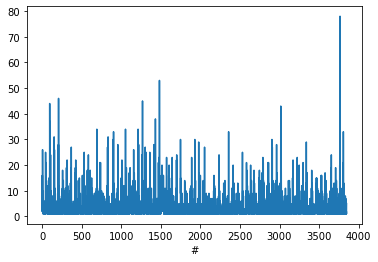

In [59]:
dry_days_duration.plot()

In [60]:
dry_days_duration.describe()

count    3847.000000
mean        3.884585
std         4.826548
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        78.000000
Name: RainNoRain, dtype: float64

<AxesSubplot:>

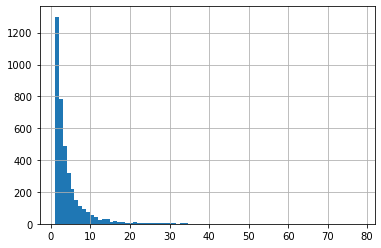

In [61]:
dry_days_duration.hist(bins=78)